<a href="https://colab.research.google.com/github/ladiyusuph/dog_vs_cat_classification/blob/main/dog_v_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Collection

In [2]:
# configuring the Kaggle.json file path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Importing the dataset from kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#Extracting the compressed files
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
#Extracting the training data 
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Train data is extracted')

Train data is extracted


In [6]:
#Extracting the test data 
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Test data is extracted')

Test data is extracted


In [7]:
import os

#Counting the number of files in the train folder
train_path, train_dirs, train_files = next(os.walk('/content/train'))
train_file_count = len(train_files)
print('Number of Train Images: ',train_file_count)

#counting the number of files in the test folder
test_path, test_dirs, test_files = next(os.walk('/content/test1'))
test_file_count = len(test_files)
print('Number of Test Images: ',test_file_count)

Number of Train Images:  25000
Number of Test Images:  12500


In [8]:
#Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)

['dog.9771.jpg', 'dog.12377.jpg', 'cat.834.jpg', 'cat.4895.jpg', 'cat.623.jpg', 'dog.10572.jpg', 'cat.7012.jpg', 'dog.12481.jpg', 'dog.698.jpg', 'cat.7149.jpg', 'cat.8204.jpg', 'dog.6140.jpg', 'cat.6791.jpg', 'dog.9527.jpg', 'dog.7681.jpg', 'dog.11000.jpg', 'dog.6947.jpg', 'cat.4695.jpg', 'dog.9903.jpg', 'dog.10153.jpg', 'dog.7252.jpg', 'cat.483.jpg', 'cat.2694.jpg', 'dog.10238.jpg', 'dog.813.jpg', 'dog.2223.jpg', 'cat.2643.jpg', 'cat.4227.jpg', 'cat.278.jpg', 'cat.902.jpg', 'dog.1550.jpg', 'dog.10815.jpg', 'dog.6918.jpg', 'dog.10103.jpg', 'dog.1854.jpg', 'dog.3821.jpg', 'cat.11603.jpg', 'dog.6148.jpg', 'dog.4549.jpg', 'dog.7773.jpg', 'cat.4426.jpg', 'dog.7322.jpg', 'dog.11783.jpg', 'cat.5903.jpg', 'cat.3902.jpg', 'dog.888.jpg', 'dog.5995.jpg', 'dog.1669.jpg', 'cat.12154.jpg', 'dog.9178.jpg', 'dog.2309.jpg', 'dog.3938.jpg', 'cat.10635.jpg', 'cat.5366.jpg', 'dog.7194.jpg', 'cat.5479.jpg', 'cat.2053.jpg', 'dog.2456.jpg', 'cat.5783.jpg', 'dog.6046.jpg', 'dog.374.jpg', 'dog.7269.jpg', 'cat

In [9]:
#Importing the dependencies
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as img
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

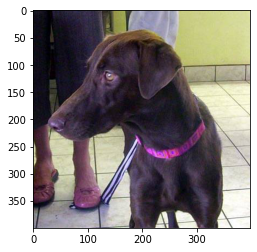

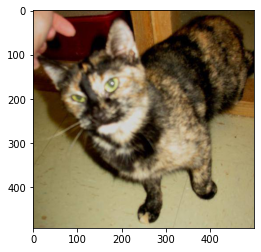

In [10]:
#Displaying the images
#Dog
dog_img = img.imread('/content/train/dog.9771.jpg')
img_plot = plt.imshow(dog_img)
plt.show()

#Cat
cat_img = img.imread('/content/train/cat.623.jpg')
img_plot = plt.imshow(cat_img)
plt.show()

In [11]:
#Viewing the distribution of the images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_ in file_names:
  name =img_[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('The number of Dog images is ',dog_count)
print('The number of Cat images is ',cat_count)


The number of Dog images is  12500
The number of Cat images is  12500


In [12]:
#Resizing the images

#Creating a directory for resized images
os.mkdir('/content/image_resized')


FileExistsError: ignored

In [13]:
og_dir = '/content/train/'
resized_dir = '/content/image_resized/'

for i in range(5000):
  file_name = os.listdir(og_dir)[i]
  img_path = og_dir + file_name

  img_ = Image.open(img_path)
  img_ = img_.resize((224,224))
  img_ = img_.convert('RGB')

  new_path = resized_dir + file_name
  img_.save(new_path)

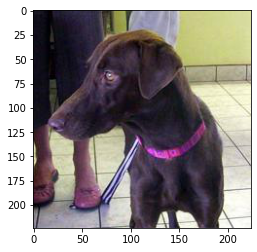

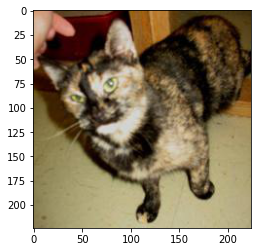

In [14]:
#Displaying resized images
#Dog
dog_img = img.imread('/content/image_resized/dog.9771.jpg')
img_plot = plt.imshow(dog_img)
plt.show()

#Cat
cat_img = img.imread('/content/image_resized/cat.623.jpg')
img_plot = plt.imshow(cat_img)
plt.show()

In [15]:
#Creating Labels for the images
#Cat -- 0
#Dog -- 1
file_names = os.listdir('/content/image_resized/')

labels = []

for i in range(5000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)
  
#Printing the distribution of the labels
dog_counter = 0
cat_counter = 0
for label in labels:
  if label ==  1:
    dog_counter += 1
  else:
    cat_counter += 1
print('There are ',dog_counter, ' number of dog images in the datasets')
print('There are ',cat_counter, ' number of cat images in the datasets')


There are  2553  number of dog images in the datasets
There are  2447  number of cat images in the datasets


In [16]:
#Converting resized images to numpy arrays
#Importing required modeules
import cv2
import glob

#image directory
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']

#Creating empty list
files = []

#Converting image to array
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

#Converting arrays into a numpy array
dog_cat_img = np.asarray([cv2.imread(file) for file in files])

In [17]:
print(dog_cat_img)

[[[[ 43  32  34]
   [ 48  37  39]
   [ 50  39  41]
   ...
   [166 227 223]
   [167 228 224]
   [168 229 225]]

  [[ 29  18  20]
   [ 35  24  26]
   [ 37  26  28]
   ...
   [164 225 221]
   [165 226 222]
   [166 227 223]]

  [[ 25  14  16]
   [ 31  20  22]
   [ 33  22  24]
   ...
   [161 222 218]
   [163 224 220]
   [163 224 220]]

  ...

  [[136 122 124]
   [141 127 129]
   [147 133 135]
   ...
   [243 248 247]
   [243 248 247]
   [242 247 246]]

  [[143 127 128]
   [146 130 131]
   [130 114 115]
   ...
   [243 248 247]
   [241 246 245]
   [238 243 242]]

  [[158 142 143]
   [157 141 142]
   [124 108 109]
   ...
   [246 251 250]
   [242 247 246]
   [239 244 243]]]


 [[[  2  35  31]
   [  0  25  21]
   [ 10  40  35]
   ...
   [ 55  51  50]
   [ 83  80  76]
   [107 104 100]]

  [[  1  34  30]
   [ 10  41  38]
   [ 32  62  57]
   ...
   [ 50  46  45]
   [ 70  67  63]
   [ 87  84  80]]

  [[  0  24  21]
   [ 23  54  51]
   [ 53  80  77]
   ...
   [ 46  42  41]
   [ 57  54  50]
   [ 66  63

In [18]:
#Vieiwng the shape of the array
print(dog_cat_img.shape)

(5000, 224, 224, 3)


In [19]:
#Seperating the data into labels and features
X = dog_cat_img
y = np.asarray(labels)

In [20]:
#Seperating the data into training and test data 
SEED = 9090
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = SEED)

#Validating the split
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(5000, 224, 224, 3) (3750, 224, 224, 3) (1250, 224, 224, 3)
(5000,) (3750,) (1250,)


In [21]:
#Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(X_test_scaled)

[[[[0.44705882 0.48235294 0.43137255]
   [0.45098039 0.48627451 0.43529412]
   [0.45490196 0.49019608 0.43921569]
   ...
   [0.55686275 0.5254902  0.49803922]
   [0.55686275 0.5254902  0.49803922]
   [0.55686275 0.5254902  0.49803922]]

  [[0.45098039 0.48627451 0.43529412]
   [0.45490196 0.49019608 0.43921569]
   [0.45882353 0.49411765 0.44313725]
   ...
   [0.56078431 0.52941176 0.50196078]
   [0.56078431 0.52941176 0.50196078]
   [0.56078431 0.52941176 0.50196078]]

  [[0.47058824 0.49803922 0.44705882]
   [0.4745098  0.50196078 0.45098039]
   [0.47843137 0.50588235 0.45490196]
   ...
   [0.56862745 0.5372549  0.50980392]
   [0.56862745 0.5372549  0.50980392]
   [0.56470588 0.53333333 0.50588235]]

  ...

  [[0.36078431 0.37647059 0.35686275]
   [0.36470588 0.38039216 0.36078431]
   [0.36470588 0.38039216 0.36078431]
   ...
   [0.51372549 0.47843137 0.43921569]
   [0.51372549 0.4745098  0.43529412]
   [0.50980392 0.47058824 0.43137255]]

  [[0.36078431 0.37647059 0.35686275]
   [0.3

Building the Model

In [22]:
import tensorflow as tf
import tensorflow_hub as hub

In [23]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [24]:
#Training the model
num_class = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_class)
])

In [25]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
#Specifying loss, accuracy and optimizer

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [27]:
#Training the model 

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
118/118 [==============================] - 116s 937ms/step - loss: 0.1073 - acc: 0.9584
Epoch 2/10
118/118 [==============================] - 112s 948ms/step - loss: 0.0513 - acc: 0.9832
Epoch 3/10
118/118 [==============================] - 115s 974ms/step - loss: 0.0384 - acc: 0.9875
Epoch 4/10
118/118 [==============================] - 114s 966ms/step - loss: 0.0354 - acc: 0.9877
Epoch 5/10
118/118 [==============================] - 115s 978ms/step - loss: 0.0265 - acc: 0.9915
Epoch 6/10
118/118 [==============================] - 113s 962ms/step - loss: 0.0220 - acc: 0.9931
Epoch 7/10
118/118 [==============================] - 113s 959ms/step - loss: 0.0192 - acc: 0.9963
Epoch 8/10
118/118 [==============================] - 113s 959ms/step - loss: 0.0170 - acc: 0.9957
Epoch 9/10
118/118 [==============================] - 115s 973ms/step - loss: 0.0157 - acc: 0.9963
Epoch 10/10
118/118 [==============================] - 114s 967ms/step - loss: 0.0124 - acc: 0.9984


In [28]:
#Model Evaluation
loss, acc = model.evaluate(X_test_scaled,y_test)
print('Model Loss on test data: ',loss)
print('Model Accuracy on test data: ',acc)

40/40 [==============================] - 50s 1s/step - loss: 0.0570 - acc: 0.9736
Model Loss on test data:  0.057021308690309525
Model Accuracy on test data:  0.9735999703407288


Making a Predictive System

Enter Image Path/content/dog.jpg


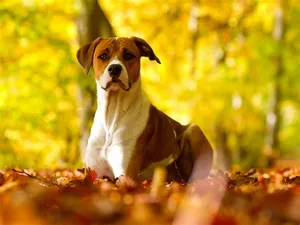

1/1 [==============================] - 1s 950ms/step
The uploaded image is a Dog


In [30]:
#Image path from user
input_path = input('Enter Image Path')

#Read the image
input_image = cv2.imread(input_path)

#Show the image
cv2_imshow(input_image)

#Resize the image
input_resized = cv2.resize(input_image, (224,224))

#Scale the image
input_scaled = input_resized/255

#Reshape the input
input_reshaped = np.reshape(input_scaled,[1,224,224,3])

#Make prediction
pred = model.predict(input_reshaped)

#Label
input_label = np.argmax(pred)

#Print the label

if input_label == 1:
  print('The uploaded image is a Dog')
else:
  print('The uploaded image is a Cat')

The Model was Able to correcly label the input image